In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('drug200.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
duplicate_rows = data[data.duplicated()]

In [8]:
duplicate_rows

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [34]:
#Chnage String values to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Drug'] = label_encoder.fit_transform(data['Drug'])
numerical_data = label_encoder.fit_transform(data['Drug'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [35]:
[numerical_data[i] for i in range(0,10)]

[4, 2, 2, 3, 4, 3, 4, 2, 4, 4]

In [36]:
data['Drug'].nunique()

5

In [37]:
x = data.drop('Drug', axis=1)

In [38]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [39]:
y = numerical_data

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
dtree = dtree.fit(x, y)

[Text(0.625, 0.9, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [23, 16, 16, 54, 91]'),
 Text(0.5, 0.7, 'BP <= 0.5\ngini = 0.667\nsamples = 109\nvalue = [23, 16, 16, 54, 0]'),
 Text(0.25, 0.5, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [23, 16, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0]'),
 Text(0.75, 0.5, 'BP <= 1.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 16, 54, 0]'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 16, 18, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 18, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 36, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 91\nvalue = [0, 0, 0, 0, 91]')]

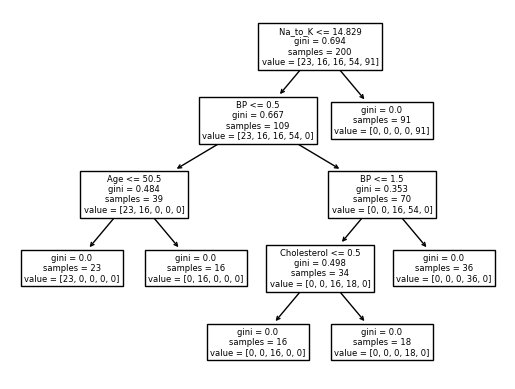

In [44]:
features = ['Age','Sex','BP','Cholesterol','Na_to_K','Drug']
tree.plot_tree(dtree, feature_names=features)

In [45]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [46]:
count_of_4 = data.apply(lambda col: (col == 4).sum())
print(count_of_4)

Age             0
Sex             0
BP              0
Cholesterol     0
Na_to_K         0
Drug           91
dtype: int64


<Axes: >

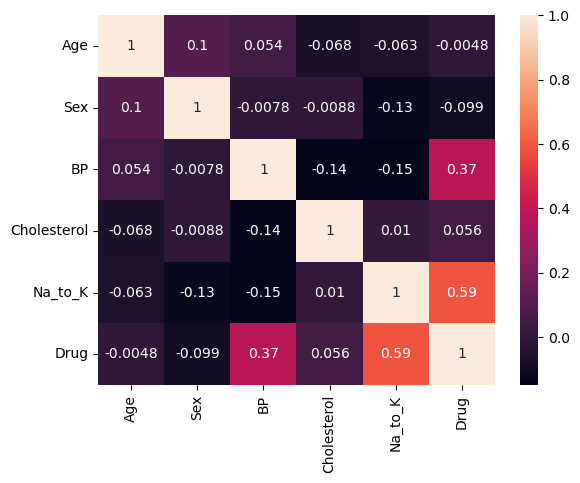

In [47]:
sns.heatmap(data.corr(),annot = True)